In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df =  pd.read_csv('PS4_GamesSales (1).csv',encoding ='unicode_escape')

In [5]:
df

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1029,Fallen Legion: Flames of Rebellion,NaN,Role-Playing,NaN,0.00,0.00,0.00,0.00,0.00
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.00,0.00,0.00,0.00,0.00
1031,The Mummy Demastered,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00
1032,Project Nimbus: Code Mirai,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00


In [8]:
top_5_games = df.sort_values(by="Global", ascending=False).head(5)
print(top_5_games[["Game", "Global"]])


                        Game  Global
0         Grand Theft Auto V   19.39
1  Call of Duty: Black Ops 3   15.09
2      Red Dead Redemption 2   13.94
3         Call of Duty: WWII   13.40
4                    FIFA 18   11.80


In [10]:
#2

In [11]:
regional_sales = df.groupby("Genre")[["North America", "Europe", "Japan", "Rest of World"]].sum()


In [36]:
regional_sales

,North America,Europe,Japan,Rest of World
Genre,,,,
Action,48.15,57.51,10.27,20.76
Action-Adventure,22.30,27.79,1.96,9.83
Adventure,5.27,6.08,1.64,2.23
Fighting,8.58,6.11,1.67,2.97
MMO,1.32,1.45,0.20,0.55
Misc,3.64,6.03,0.96,1.85
Music,2.40,1.62,0.17,0.84
Party,0.09,0.47,0.00,0.10
Platform,5.48,8.92,0.67,2.77


In [13]:
#3

In [14]:
top_publisher = df.groupby("Publisher")["Global"].sum().idxmax()
top_publisher_sales = df.groupby("Publisher")["Global"].sum().max()
print(f"Top Publisher: {top_publisher} with {top_publisher_sales} million sales.")

Top Publisher: Activision with 72.44 million sales.


In [15]:
#4

In [16]:
most_releases_year = df["Year"].value_counts().idxmax()
release_count = df["Year"].value_counts().max()
print(f"Year with most releases: {most_releases_year} ({release_count} games)")

Year with most releases: 2017.0 (254 games)


In [17]:
#5

In [18]:
top_genre = df.groupby("Genre")["Global"].sum().idxmax()
top_genre_sales = df.groupby("Genre")["Global"].sum().max()
print(f"Most Popular Genre: {top_genre} with {top_genre_sales} million global sales.")

Most Popular Genre: Action with 136.82 million global sales.


In [21]:
#6

In [20]:
df["Japan_vs_Others"] = df["Japan"] - (df["North America"] + df["Europe"] + df["Rest of World"])
highest_japan_sales_game = df.loc[df["Japan_vs_Others"].idxmax()]
print(highest_japan_sales_game[["Game", "Japan", "North America", "Europe", "Rest of World"]])


Game             Dragon Quest XI
Japan                       1.43
North America               0.29
Europe                      0.22
Rest of World                0.1
Name: 81, dtype: object


In [22]:
#7


In [23]:
correlation = df["North America"].corr(df["Europe"])
print(f"Correlation between North America and Europe sales: {correlation:.2f}")

Correlation between North America and Europe sales: 0.81


In [24]:
#8


In [26]:
action_shooter_sales = df[df["Genre"].isin(["Action", "Shooter"])].groupby(["Year", "Genre"])["Global"].sum().unstack()
action_shooter_sales

Genre,Action,Shooter
Year,,
2013.0,1.91,11.13
2014.0,31.97,21.38
2015.0,29.73,36.95
2016.0,25.89,34.34
2017.0,30.51,30.92
2018.0,16.81,0.27
2019.0,0.00,0.00
2020.0,0.00,NaN


In [27]:
#9

In [28]:
regions = ["North America", "Europe", "Japan", "Rest of World"]
for region in regions:
    top_publisher_region = df.groupby("Publisher")[region].sum().idxmax()
    top_sales_region = df.groupby("Publisher")[region].sum().max()
    print(f"Top Publisher in {region}: {top_publisher_region} with {top_sales_region} million sales.")

Top Publisher in North America: Activision with 28.2 million sales.
Top Publisher in Europe: Activision with 30.96 million sales.
Top Publisher in Japan: Square Enix with 5.95 million sales.
Top Publisher in Rest of World: Activision with 11.709999999999999 million sales.


In [29]:
#10

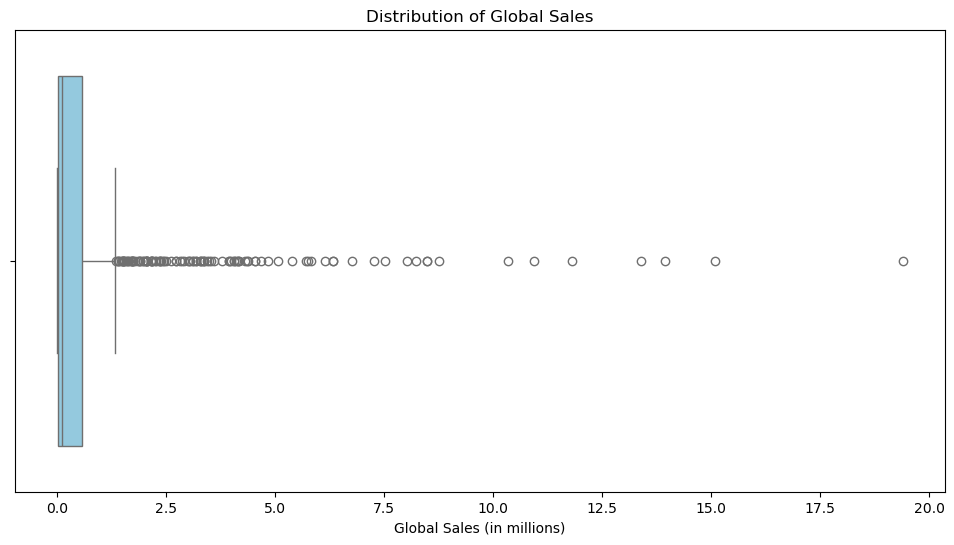

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Global"], color="skyblue")
plt.title("Distribution of Global Sales")
plt.xlabel("Global Sales (in millions)")
plt.show()

In [32]:
#11

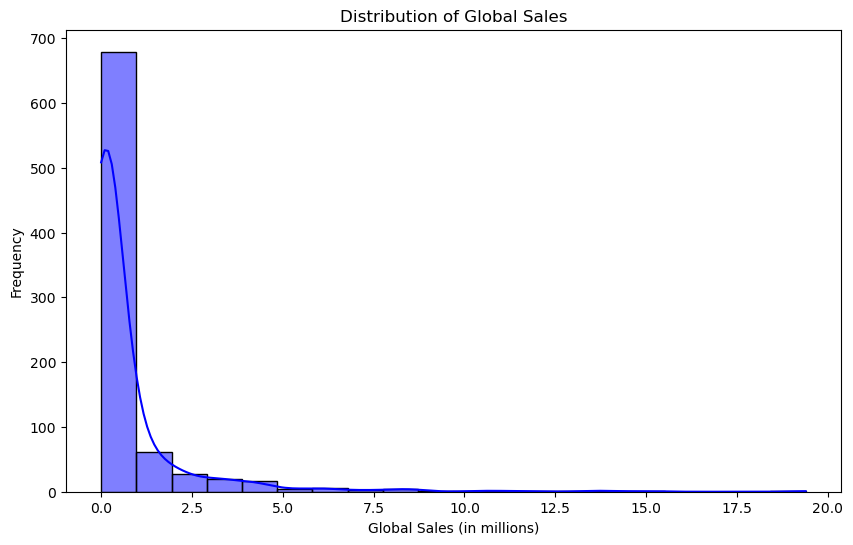

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Global"], bins=20, kde=True, color="blue")
plt.title("Distribution of Global Sales")
plt.xlabel("Global Sales (in millions)")
plt.ylabel("Frequency")
plt.show()

<Figure size 1000x600 with 0 Axes>

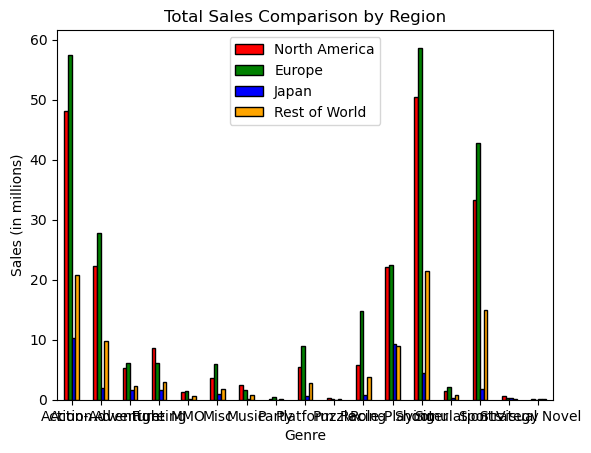

In [39]:
plt.figure(figsize=(10, 6))
regional_sales.plot(kind="bar", color=["red", "green", "blue", "orange"], edgecolor="black")
plt.title("Total Sales Comparison by Region")
plt.ylabel("Sales (in millions)")
plt.xticks(rotation=0)
plt.show()


In [50]:
genre_sales = df.groupby("Genre")["Global"].sum()

plt.figure(figsize=(8, 8))
top_genre.plot(kind="pie", autopct="%.1f%%", colormap="tab10", startangle=90)
plt.title("Share of Total Global Sales by Genre")
plt.ylabel("")  
plt.show()

AttributeError: 'str' object has no attribute 'plot'

<Figure size 800x800 with 0 Axes>

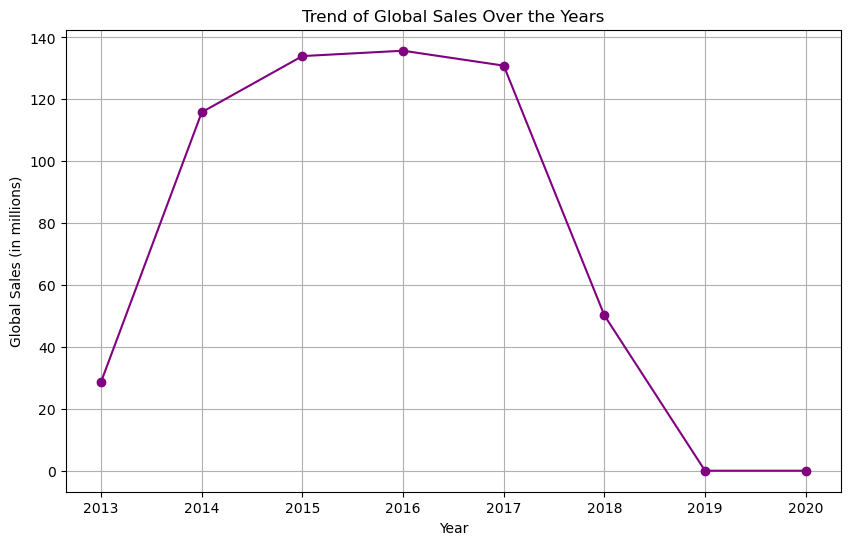

In [49]:

sales_by_year = df.groupby("Year")["Global"].sum()


plt.figure(figsize=(10, 6))
sales_by_year.plot(kind="line", marker="o", color="purple")
plt.title("Trend of Global Sales Over the Years")
plt.xlabel("Year")
plt.ylabel("Global Sales (in millions)")
plt.grid(True)
plt.show()


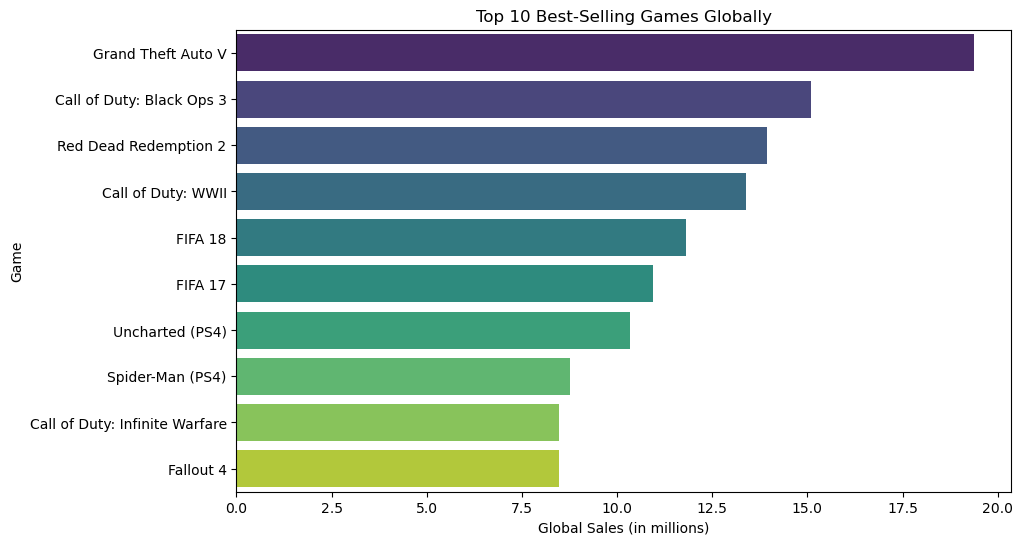

In [51]:
top_10_games = df.sort_values(by="Global", ascending=False).head(10)

# Horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="Global", y="Game", data=top_10_games, palette="viridis")
plt.title("Top 10 Best-Selling Games Globally")
plt.xlabel("Global Sales (in millions)")
plt.ylabel("Game")
plt.show()

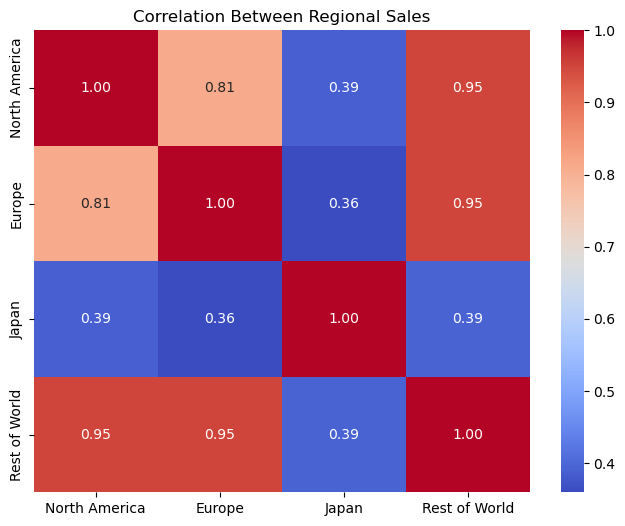

In [53]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[["North America", "Europe", "Japan", "Rest of World"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Regional Sales")
plt.show()

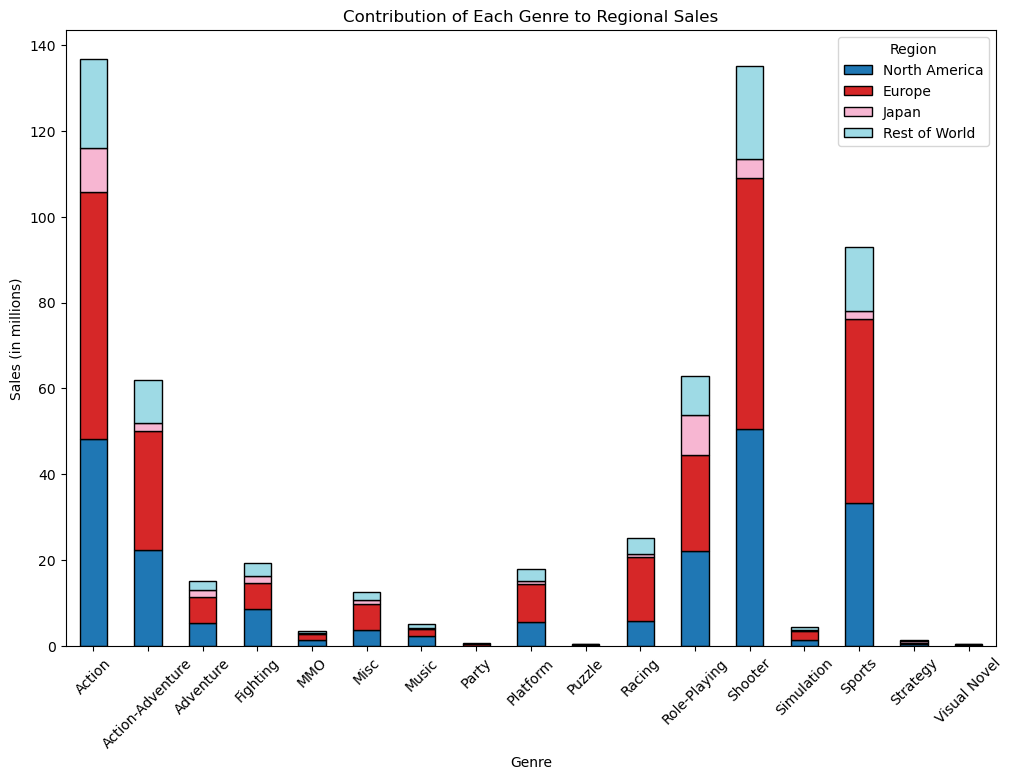

In [54]:
regional_genre_sales = df.groupby("Genre")[["North America", "Europe", "Japan", "Rest of World"]].sum()

regional_genre_sales.plot(kind="bar", stacked=True, figsize=(12, 8), colormap="tab20", edgecolor="black")
plt.title("Contribution of Each Genre to Regional Sales")
plt.ylabel("Sales (in millions)")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.show()

## ***1. What insights or patterns did you discover during your analysis?***


In [66]:
#The top-selling PS4 game globally, Grand Theft Auto V, outperformed all others by a significant margin.
#Regional preferences vary significantly:
#North America shows a strong inclination towards Shooter games.
#Japan favors Role-Playing games, often with much higher sales than in other regions.
#Europe has balanced preferences across genres like Sports and Shooter.
#The Action genre dominated global sales, reflecting its universal appeal.
#There was a strong positive correlation between sales in North America and Europe, likely due to cultural and economic similarities.
#Sales of Shooter games showed a consistent growth trend over the years, surpassing the Action genre in some years.


## ***2. Did anything in the data surprise you? If yes, what was it?***

In [67]:
#The dominance of a few publishers, like Rockstar Games and Activision, in global sales was surprising. A handful of companies account for most of the success in the industry.
#The limited contribution of Japanese sales to global sales was unexpected, considering Japan’s role as a key gaming hub.
#Certain games, such as FIFA 18, achieved high sales worldwide, demonstrating the global appeal of sports, even in regions where soccer isn't traditionally dominant.


## ***3. What challenges did you face, and how did you overcome them?***

In [68]:
#Handling missing values: Some data rows had incomplete information. This was addressed by either removing or imputing missing data, depending on the analysis context.
#Visualizing stacked bar charts: Creating clear, interpretable stacked bar charts required careful handling of data aggregation and choosing effective color schemes.
#Interpreting correlations: While the heatmap revealed relationships, interpreting their practical significance required further contextual understanding of regional preferences.



## ***4. How do you think data analysis can help in making real-world decisions?***

In [69]:
#Game Development: Insights into regional preferences and genre popularity can guide game studios in designing games tailored to target audiences.
#Marketing Strategies: Publishers can allocate resources more efficiently by identifying high-demand regions and genres.
#Product Planning: Recognizing trends over time allows companies to predict future market needs and invest in promising genres.
#Competitor Analysis: Understanding what drives the success of top-performing games can help competitors innovate and adapt.


## ***5. What skills or knowledge do you feel you have improved during this project?***

In [70]:
#Data Visualization: Creating meaningful visualizations like heatmaps, pie charts, and stacked bar charts helped communicate insights effectively.
#Data Wrangling: Cleaning and transforming data to prepare it for analysis reinforced my ability to handle messy datasets.
#Sales Trends Analysis: Identifying trends over time improved my ability to recognize and interpret patterns in temporal data.
#Programming in Python: Writing efficient code for data aggregation, filtering, and analysis enhanced my technical proficiency.
#Business Insight Extraction: Translating data into actionable business insights improved my strategic thinking skills.
